In [5]:
# Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
#
import pandas as pd
import numpy as np
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [21]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6)

In [22]:
#  3. Convert the June temperatures to a list.
june_results = session.query(Measurement.date, Measurement.prcp)
june_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

In [38]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results , columns=['date','precipitation'])
june_df.set_index(df['date'], inplace=True)
june_df.describe()

,precipitation
count,589.000000
mean,0.125433
std,0.298283
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.000000


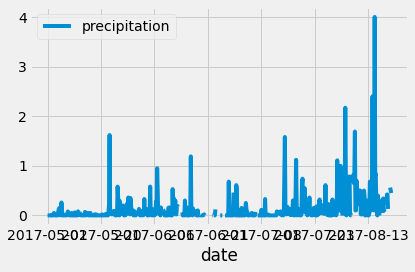

In [33]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.plot()
plt.tight_layout()

## D2: Determine the Summary Statistics for December

In [27]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12)


SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [28]:
# 7. Convert the December temperatures to a list.
december_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

In [35]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_pd = pd.DataFrame(december_results , columns=['date','precipitation'])
december_pd.set_index(df['date'], inplace=True)
december_pd

,date,precipitation
date,,
2017-05-02,2017-05-02,0.00
2017-05-02,2017-05-02,0.00
2017-05-02,2017-05-02,0.00
2017-05-02,2017-05-02,0.01
2017-05-02,2017-05-02,0.03
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


In [36]:
december_pd = df.sort_index()
#print(df.to_string(index=False))

In [37]:
december_pd.describe()

,precipitation
count,589.000000
mean,0.125433
std,0.298283
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.000000


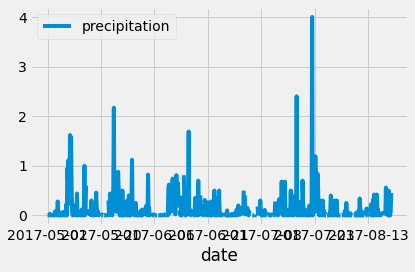

In [32]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_results.plot()
plt.tight_layout()